### Loading necessary library

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import xgboost


### Loading Dataset

In [98]:
data = pd.read_csv("/home/hasan/DATA SET/drug classification.csv")

### Data Description

In [99]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [100]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [101]:
data.count().isnull()

Age            False
Sex            False
BP             False
Cholesterol    False
Na_to_K        False
Drug           False
dtype: bool

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


### Exploratory Data Analysis

In [103]:
# Age feature

In [104]:
# total number of unique age
n_unique_age = data.Age.nunique()
print("Number of unique ages are :", n_unique_age)

# minimum and maximum age
min_age = data.Age.min()
print("Minimum age :", min_age)
max_age = data.Age.max()
print("Maximum age :", max_age)

Number of unique ages are : 57
Minimum age : 15
Maximum age : 74


In [105]:
data.Age.value_counts()

47    8
49    7
23    7
28    7
39    6
32    6
50    5
22    5
58    5
37    5
60    5
43    4
42    4
41    4
74    4
51    4
34    4
31    4
26    4
24    4
20    4
36    4
45    4
72    4
56    4
57    4
68    4
67    4
65    4
61    4
64    3
35    3
16    3
18    3
70    3
69    3
53    3
15    3
40    3
38    3
59    3
55    2
48    2
19    2
46    2
73    2
52    2
66    2
29    2
62    2
33    1
25    1
21    1
30    1
54    1
17    1
63    1
Name: Age, dtype: int64

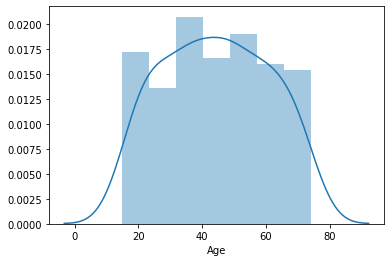

In [106]:
sns.distplot(data.Age)
plt.show()

In [107]:
# Sex Feature

In [108]:
data.Sex.value_counts()

M    104
F     96
Name: Sex, dtype: int64

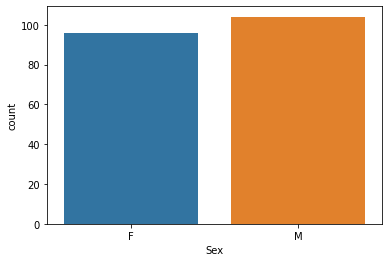

In [109]:
sns.countplot(data.Sex)
plt.show()

In [110]:
# BP Feature

In [111]:
data.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

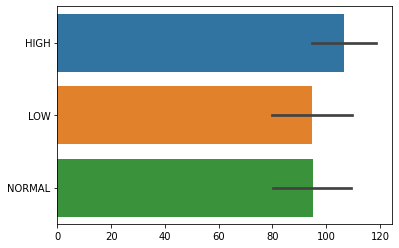

In [112]:
sns.barplot(x=data.BP.index, y=data.BP.values)


In [113]:
# Cholesterol Feature

In [114]:
data.Cholesterol.value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

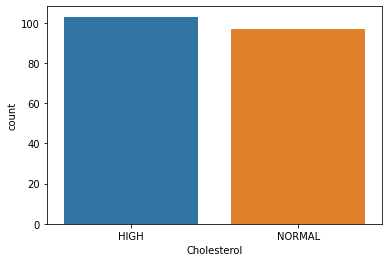

In [115]:
sns.countplot(data.Cholesterol)
plt.show()

In [116]:
# Na_to_K Feature

In [117]:
print("Minimum value of Na_to_K is :", data.Na_to_K.min())
print("Maximum value of Na_to_K is :", data.Na_to_K.max())
print("Average value of Na_to_K is :", data.Na_to_K.mean())

Minimum value of Na_to_K is : 6.269
Maximum value of Na_to_K is : 38.247
Average value of Na_to_K is : 16.08448499999999


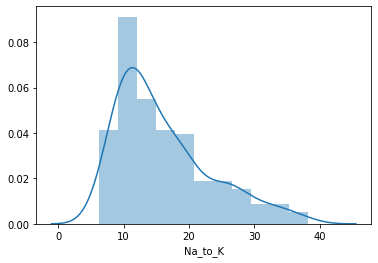

In [118]:
sns.distplot(data.Na_to_K)
plt.show()

In [119]:
# Drug Features

In [120]:
data.Drug.value_counts()

DrugY    91
drugX    54
drugA    23
drugB    16
drugC    16
Name: Drug, dtype: int64

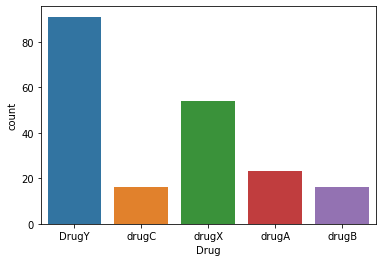

In [121]:
sns.countplot(data.Drug)
plt.show()

### Relation between Age and Drug

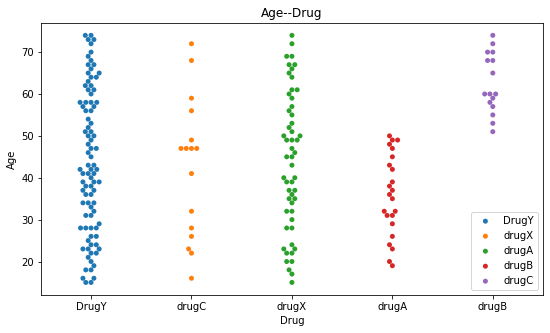

In [122]:
plt.figure(figsize=(9,5))
sns.swarmplot(x="Drug", y='Age', data=data)
plt.legend(data.Drug.value_counts().index)
plt.title("Age--Drug")
plt.show()

In [123]:
print("Maximum age of drugA is :", data.Age[data.Drug=='drugA'].max())
print("Minimum age of drugB is :", data.Age[data.Drug=='drugB'].min())


Maximum age of drugA is : 50
Minimum age of drugB is : 51


### Relation between Sex and Drug

In [124]:
sex_drug = data.groupby(['Drug', 'Sex']).size().reset_index(name='Count')
sex_drug

,Drug,Sex,Count
0,DrugY,F,47
1,DrugY,M,44
2,drugA,F,9
3,drugA,M,14
4,drugB,F,6
5,drugB,M,10
6,drugC,F,7
7,drugC,M,9
8,drugX,F,27
9,drugX,M,27


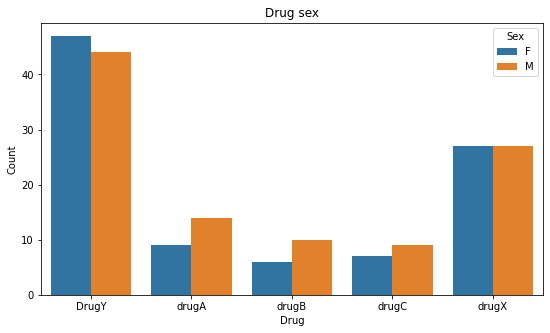

In [125]:
plt.figure(figsize=(9,5))
sns.barplot(x="Drug", y='Count', hue='Sex', data=sex_drug)
plt.title("Drug sex")
plt.show()

### Relation between Drug and BP

In [126]:
drug_bp = data.groupby(['Drug', 'BP']).size().reset_index(name='Count')
drug_bp

,Drug,BP,Count
0,DrugY,HIGH,38
1,DrugY,LOW,30
2,DrugY,NORMAL,23
3,drugA,HIGH,23
4,drugB,HIGH,16
5,drugC,LOW,16
6,drugX,LOW,18
7,drugX,NORMAL,36


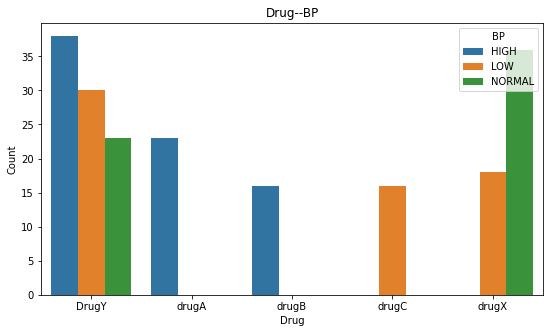

In [127]:
plt.figure(figsize=(9,5))
sns.barplot(x='Drug', y="Count", hue="BP", data=drug_bp)
plt.title("Drug--BP")
plt.show()

### Relation between Drug and Cholesterol

In [128]:
drug_cholesterol = data.groupby(['Drug', 'Cholesterol']).size().reset_index(name='Count')
drug_cholesterol

,Drug,Cholesterol,Count
0,DrugY,HIGH,47
1,DrugY,NORMAL,44
2,drugA,HIGH,12
3,drugA,NORMAL,11
4,drugB,HIGH,8
5,drugB,NORMAL,8
6,drugC,HIGH,16
7,drugX,HIGH,20
8,drugX,NORMAL,34


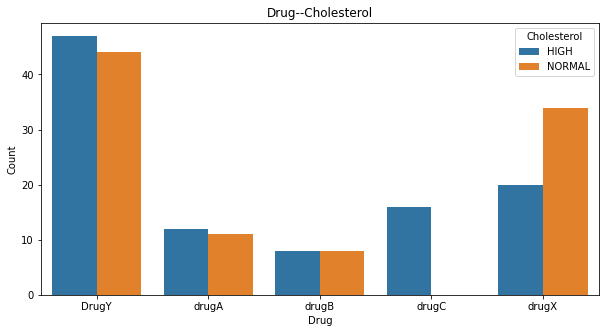

In [129]:
plt.figure(figsize=(10,5))
sns.barplot(x='Drug', y='Count', hue='Cholesterol', data=drug_cholesterol)
plt.title("Drug--Cholesterol")
plt.show()

### Relation between Drug and Na_to_K

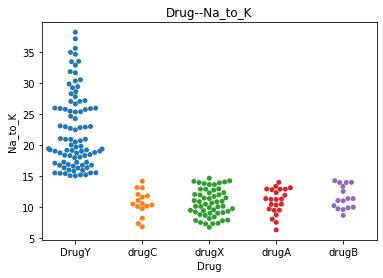

In [130]:
sns.swarmplot(x='Drug', y='Na_to_K', data=data)
plt.title('Drug--Na_to_K')
plt.show()

In [131]:
print("Minimum number of Na_to_K for DrugY :", data.Na_to_K[data.Drug == 'DrugY'].min())

Minimum number of Na_to_K for DrugY : 15.015


### Relation between Drug, Na_to_K and BP

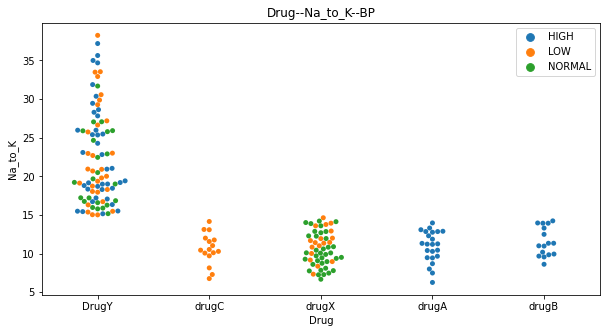

In [132]:
plt.figure(figsize=(10,5))
sns.swarmplot(x='Drug', y='Na_to_K', hue="BP", data=data)
plt.legend()
plt.title("Drug--Na_to_K--BP")
plt.show()

### Feature Engineering

In [133]:
data['Na_to_K_gre_fifteen'] = [1 if i >15 else 0 for i in data.Na_to_K]
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Na_to_K_gre_fifteen
0,23,F,HIGH,HIGH,25.355,DrugY,1
1,47,M,LOW,HIGH,13.093,drugC,0
2,47,M,LOW,HIGH,10.114,drugC,0
3,28,F,NORMAL,HIGH,7.798,drugX,0
4,61,F,LOW,HIGH,18.043,DrugY,1


In [134]:
drug_greater_than_fifteen = data.groupby(['Drug', 'Na_to_K_gre_fifteen']).size().reset_index(name="Count")
drug_greater_than_fifteen

,Drug,Na_to_K_gre_fifteen,Count
0,DrugY,1,91
1,drugA,0,23
2,drugB,0,16
3,drugC,0,16
4,drugX,0,54


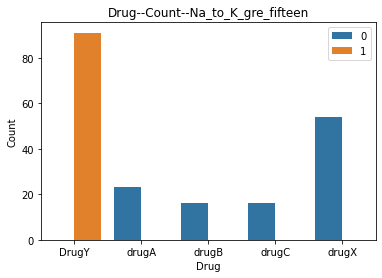

In [135]:
sns.barplot(x='Drug', y='Count', hue="Na_to_K_gre_fifteen", data=drug_greater_than_fifteen)
plt.legend()
plt.title("Drug--Count--Na_to_K_gre_fifteen")
plt.show()


### Label Encoding

In [136]:
cholesterol = {"HIGH":1, "NORMAL":0}
bp = {"HIGH":2, "LOW":0, "NORMAL":1}
sex = {"F":1, "M":0}
drug = {"drugA":0, "drugB":1, "drugC":2, "drugX":3, "DrugY":4}

In [137]:
# using map
data.Cholesterol = data.Cholesterol.map(cholesterol)
data.BP = data.BP.map(bp)
data.Sex = data.Sex.map(sex)
data.Drug = data.Drug.map(drug)
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Na_to_K_gre_fifteen
0,23,1,2,1,25.355,4,1
1,47,0,0,1,13.093,2,0
2,47,0,0,1,10.114,2,0
3,28,1,1,1,7.798,3,0
4,61,1,0,1,18.043,4,1


### Splitting dataset

In [138]:
X = data.drop('Drug', axis=1)
y = data['Drug']

In [139]:
Xtrain, xtest, Ytrain,ytest = train_test_split(X,y, test_size=.2, random_state=42, shuffle=True)


In [140]:
Ytrain = Ytrain.values.reshape(-1,1)
ytest = ytest.values.reshape(-1,1)

In [141]:
print("Shap of the Xtrain is :", Xtrain.shape)
print("Shape of the xtest is :", xtest.shape)
print("Shape of the Ytrain is :", Ytrain.shape)
print("Shape of the ytest is :", ytest.shape)

Shap of the Xtrain is : (160, 6)
Shape of the xtest is : (40, 6)
Shape of the Ytrain is : (160, 1)
Shape of the ytest is : (40, 1)


### RandomForest Algorithm

In [142]:
rfc = RandomForestClassifier()

In [143]:
hyperparameter_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}


In [144]:
random_cv = RandomizedSearchCV(estimator=rfc,
            param_distributions=hyperparameter_grid,
            cv=5, 
            n_iter=50,
            scoring = 'neg_mean_absolute_error',
            n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [145]:
random_cv.fit(Xtrain,Ytrain)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   16.9s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  2.3min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  3.5min finished
/home/hasan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/hasan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [146]:
random_cv.best_estimator_

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=70, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [147]:
rfc = RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=90, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [148]:
rfc.fit(Xtrain,Ytrain)


/home/hasan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=90, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [149]:
predict = rfc.predict(xtest)
predict

array([3, 4, 3, 2, 4, 4, 4, 3, 0, 3, 0, 3, 4, 0, 1, 4, 1, 3, 2, 4, 1, 3,
       3, 4, 4, 4, 2, 3, 4, 3, 4, 2, 2, 4, 0, 4, 3, 0, 4, 0])

### Using cross_val_score

In [150]:
#cross_val_score in train data
cvs = cross_val_score(rfc, Xtrain,Ytrain,cv=5)
cvs

/home/hasan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/hasan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/hasan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/hasan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionW

array([0.97142857, 1.        , 1.        , 0.96666667, 1.        ])

In [151]:
cvs.mean()

0.9876190476190476

### XGBoost Algorithm

In [152]:
classifier=xgboost.XGBClassifier()

In [153]:
hyperparameter_grid = {
    'n_estimators': [100, 500, 900, 1100, 1500],
    'max_depth':[2, 3, 5, 10, 15],
    'learning_rate':[0.05,0.1,0.15,0.20],
    'min_child_weight':[1,2,3,4],
    'booster':['gbtree','gblinear'],
    'base_score':[0.25,0.5,0.75,1]
    }


In [154]:
random_cv = RandomizedSearchCV(estimator=classifier,
            param_distributions=hyperparameter_grid,
            cv=5, 
            n_iter=50,
            scoring = 'neg_mean_absolute_error',
            n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [155]:
random_cv.fit(Xtrain,Ytrain)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:    6.8s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   12.0s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:   18.2s finished
/home/hasan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/hasan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/hasan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: Da

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_co...
                   iid='warn', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                     

In [156]:
random_cv.best_estimator_

XGBClassifier(base_score=0.25, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=900, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [157]:
classifier=xgboost.XGBClassifier(base_score=0.25, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1,
              n_estimators=900, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [158]:
classifier.fit(Xtrain,Ytrain)


XGBClassifier(base_score=0.25, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=900, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [159]:
predict = classifier.predict(xtest)
predict

array([3, 4, 3, 2, 4, 4, 4, 3, 0, 3, 0, 3, 4, 0, 1, 4, 1, 3, 2, 4, 1, 3,
       3, 4, 4, 4, 2, 3, 4, 3, 4, 2, 2, 4, 0, 4, 3, 0, 4, 0])

### Using Cross_val_score

In [160]:
#cross_val_score in train data
cvs = cross_val_score(classifier, Xtrain,Ytrain,cv=5)
cvs

/home/hasan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/hasan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1.        , 1.        , 1.        , 0.96666667, 1.        ])

In [161]:
cvs.mean()

0.9933333333333334

### Model Saving

In [ ]:
# save the model to disk
filename = 'Drug_Classification.sav'
pickle.dump(classifier, open(filename, 'wb'))


### Model Loading

In [ ]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
